In [1]:
import tensorflow as tf

from algos.convex_naf import ConvexNAFAlgorithm
from algos.ddpg import DDPG as MyDDPG
from qfunctions.convex_naf_qfunction import ConcaveNAF
from qfunctions.nn_qfunction import FeedForwardCritic
from qfunctions.quadratic_naf_qfunction import QuadraticNAF
from qfunctions.quadratic_qf import QuadraticQF
from policies.nn_policy import FeedForwardPolicy
from rllab.exploration_strategies.ou_strategy import OUStrategy

from rllab.envs.box2d.cartpole_env import CartpoleEnv
from rllab.envs.normalized_env import normalize

import matplotlib.pyplot as plt
import numpy as np

In [2]:
BATCH_SIZE = 128
N_EPOCHS = 50
EPOCH_LENGTH = 100
EVAL_SAMPLES = 100
DISCOUNT = 0.99
QF_LEARNING_RATE = 1e-3
POLICY_LEARNING_RATE = 1e-4
BATCH_LEARNING_RATE = 1e-2
SOFT_TARGET_TAU = 1e-2
REPLAY_POOL_SIZE = 1000000
MIN_POOL_SIZE = 256
SCALE_REWARD = 1.0
QF_WEIGHT_DECAY = 0.01
MAX_PATH_LENGTH = 1000
N_UPDATES_PER_TIME_STEP = 5

QF_TYPE = ''

In [3]:
env = normalize(CartpoleEnv())
policy_params = dict(
    observation_hidden_sizes=(100, 100),
    hidden_nonlinearity=tf.nn.relu,
    output_nonlinearity=tf.nn.tanh,
)
algo_params = dict(
    batch_size=BATCH_SIZE,
    n_epochs=N_EPOCHS,
    epoch_length=EPOCH_LENGTH,
    eval_samples=EVAL_SAMPLES,
    discount=DISCOUNT,
#     policy_learning_rate=POLICY_LEARNING_RATE,
    qf_learning_rate=QF_LEARNING_RATE,
    soft_target_tau=SOFT_TARGET_TAU,
    replay_pool_size=REPLAY_POOL_SIZE,
    min_pool_size=MIN_POOL_SIZE,
    scale_reward=SCALE_REWARD,
    max_path_length=MAX_PATH_LENGTH,
    qf_weight_decay=QF_WEIGHT_DECAY,
)

es = OUStrategy(env_spec=env.spec)

optimizer_type = 'sgd'
qf = ConcaveNAF(
    name_or_scope="qf",
    env_spec=env.spec,
    optimizer_type=optimizer_type,
)
algorithm = ConvexNAFAlgorithm(
    env,
    es,
    qf,
    **algo_params
)


Making SGD optimizer
/Users/vitchyr/git/rail-rl/algos/naf.py
qf params =
['qf/advantage_function/observation_mlp/hidden0/weights:0', 'qf/advantage_function/observation_mlp/hidden0/bias:0', 'qf/advantage_function/observation_mlp/hidden1/weights:0', 'qf/advantage_function/observation_mlp/hidden1/bias:0', 'qf/advantage_function/fusion_mlp/hidden0/weights:0', 'qf/advantage_function/fusion_mlp/hidden0/bias:0', 'qf/advantage_function/fusion_mlp/hidden1/weights:0', 'qf/advantage_function/fusion_mlp/hidden1/bias:0', 'qf/advantage_function/fusion_mlp/output_linear/weights:0', 'qf/advantage_function/fusion_mlp/output_linear/bias:0', 'qf/V_function/hidden0/weights:0', 'qf/V_function/hidden0/bias:0', 'qf/V_function/hidden1/weights:0', 'qf/V_function/hidden1/bias:0', 'qf/V_function/weights:0', 'qf/V_function/bias:0']


In [4]:
policy = qf.implicit_policy

In [8]:
algorithm.train()

2016-12-16 14:54:48.115318 PST | Populating workers...
2016-12-16 14:54:48.117235 PST | Populated
2016-12-16 14:54:48.119028 PST | Epoch #0 | Training started
2016-12-16 14:54:59.668722 PST | Epoch #0 | Training finished. Time: 11.548182010650635
2016-12-16 14:54:59.670187 PST | Epoch #1 | Training started
2016-12-16 14:55:13.756191 PST | Epoch #1 | Training finished. Time: 14.08236813545227
2016-12-16 14:55:13.757782 PST | Epoch #2 | Training started
2016-12-16 14:55:33.327501 PST | Epoch #2 | Training finished. Time: 19.5682110786438
2016-12-16 14:55:33.332441 PST | Epoch #2 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:14


2016-12-16 14:56:06.410186 PST | Epoch #2 | Eval time: 33.077747106552124
2016-12-16 14:56:06.417072 PST | ---------------------  ----------
2016-12-16 14:56:06.421595 PST | Epoch                    2
2016-12-16 14:56:06.423059 PST | AverageReturn           89.9448
2016-12-16 14:56:06.424423 PST | QfLoss                  17.6724
2016-12-16 14:56:06.426926 PST | YsMean                   9.5543
2016-12-16 14:56:06.428580 PST | YsStd                    3.1907
2016-12-16 14:56:06.430040 PST | YsMax                   11.1195
2016-12-16 14:56:06.431260 PST | YsMin                    0
2016-12-16 14:56:06.432734 PST | QfOutputMean             7.58234
2016-12-16 14:56:06.436189 PST | QfOutputStd              0.766202
2016-12-16 14:56:06.437941 PST | QfOutputMax              9.8817
2016-12-16 14:56:06.439363 PST | QfOutputMin              6.43683
2016-12-16 14:56:06.440636 PST | TargetVfOutputMean       0.599884
2016-12-16 14:56:06.442054 PST | TargetVfOutputStd        0.218116
2016-12-16 14:56

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:27


2016-12-16 14:57:13.609910 PST | Epoch #3 | Eval time: 49.87669110298157
2016-12-16 14:57:13.613446 PST | ---------------------  ----------
2016-12-16 14:57:13.616534 PST | Epoch                    3
2016-12-16 14:57:13.618583 PST | AverageReturn          108.837
2016-12-16 14:57:13.620067 PST | QfLoss                  14.3364
2016-12-16 14:57:13.621509 PST | YsMean                  13.6357
2016-12-16 14:57:13.623242 PST | YsStd                    4.14499
2016-12-16 14:57:13.625485 PST | YsMax                   16.3586
2016-12-16 14:57:13.627711 PST | YsMin                    0
2016-12-16 14:57:13.628937 PST | QfOutputMean            13.7147
2016-12-16 14:57:13.630946 PST | QfOutputStd              0.996675
2016-12-16 14:57:13.633453 PST | QfOutputMax             14.9707
2016-12-16 14:57:13.634910 PST | QfOutputMin             10.2689
2016-12-16 14:57:13.636588 PST | TargetVfOutputMean       4.93977
2016-12-16 14:57:13.638561 PST | TargetVfOutputStd        0.33025
2016-12-16 14:57:13.6

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:19


2016-12-16 14:58:16.871440 PST | Epoch #4 | Eval time: 40.902178049087524
2016-12-16 14:58:16.874882 PST | ---------------------  ---------
2016-12-16 14:58:16.877844 PST | Epoch                    4
2016-12-16 14:58:16.879851 PST | AverageReturn          121.197
2016-12-16 14:58:16.882462 PST | QfLoss                  19.9468
2016-12-16 14:58:16.884699 PST | YsMean                  19.5456
2016-12-16 14:58:16.886775 PST | YsStd                    5.70316
2016-12-16 14:58:16.888783 PST | YsMax                   22.6708
2016-12-16 14:58:16.890823 PST | YsMin                    0
2016-12-16 14:58:16.893298 PST | QfOutputMean            18.2222
2016-12-16 14:58:16.895760 PST | QfOutputStd              2.7942
2016-12-16 14:58:16.897613 PST | QfOutputMax             21.111
2016-12-16 14:58:16.899410 PST | QfOutputMin              8.9485
2016-12-16 14:58:16.901764 PST | TargetVfOutputMean      11.3371
2016-12-16 14:58:16.903386 PST | TargetVfOutputStd        1.03992
2016-12-16 14:58:16.90504

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:20


2016-12-16 14:59:17.341895 PST | Epoch #5 | Eval time: 40.09872007369995
2016-12-16 14:59:17.345254 PST | ---------------------  ---------
2016-12-16 14:59:17.346923 PST | Epoch                    5
2016-12-16 14:59:17.349312 PST | AverageReturn           92.9459
2016-12-16 14:59:17.351349 PST | QfLoss                  23.5678
2016-12-16 14:59:17.353067 PST | YsMean                  23.7727
2016-12-16 14:59:17.354530 PST | YsStd                    8.2798
2016-12-16 14:59:17.356352 PST | YsMax                   30.1819
2016-12-16 14:59:17.357796 PST | YsMin                    0
2016-12-16 14:59:17.359230 PST | QfOutputMean            22.2902
2016-12-16 14:59:17.360675 PST | QfOutputStd              5.83136
2016-12-16 14:59:17.362240 PST | QfOutputMax             30.3118
2016-12-16 14:59:17.363754 PST | QfOutputMin              7.86554
2016-12-16 14:59:17.365177 PST | TargetVfOutputMean      16.8335
2016-12-16 14:59:17.366809 PST | TargetVfOutputStd        2.99306
2016-12-16 14:59:17.368

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:21


2016-12-16 15:00:24.615404 PST | Epoch #6 | Eval time: 43.3121280670166
2016-12-16 15:00:24.618982 PST | ---------------------  ---------
2016-12-16 15:00:24.621173 PST | Epoch                    6
2016-12-16 15:00:24.622543 PST | AverageReturn           80.8536
2016-12-16 15:00:24.624478 PST | QfLoss                  26.7301
2016-12-16 15:00:24.625940 PST | YsMean                  27.281
2016-12-16 15:00:24.627444 PST | YsStd                   10.8891
2016-12-16 15:00:24.629783 PST | YsMax                   38.7423
2016-12-16 15:00:24.631123 PST | YsMin                    0
2016-12-16 15:00:24.633779 PST | QfOutputMean            26.3587
2016-12-16 15:00:24.635957 PST | QfOutputStd              8.268
2016-12-16 15:00:24.637940 PST | QfOutputMax             38.1514
2016-12-16 15:00:24.639748 PST | QfOutputMin              4.98993
2016-12-16 15:00:24.641247 PST | TargetVfOutputMean      21.5906
2016-12-16 15:00:24.643306 PST | TargetVfOutputStd        5.59566
2016-12-16 15:00:24.645117 

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:23


2016-12-16 15:01:39.989373 PST | Epoch #7 | Eval time: 47.68776297569275
2016-12-16 15:01:39.992710 PST | ---------------------  ---------
2016-12-16 15:01:39.994347 PST | Epoch                    7
2016-12-16 15:01:39.995987 PST | AverageReturn           85.3994
2016-12-16 15:01:39.997464 PST | QfLoss                  27.7461
2016-12-16 15:01:39.998865 PST | YsMean                  31.6032
2016-12-16 15:01:40.003613 PST | YsStd                   13.0942
2016-12-16 15:01:40.006037 PST | YsMax                   44.7054
2016-12-16 15:01:40.007433 PST | YsMin                    0
2016-12-16 15:01:40.009062 PST | QfOutputMean            29.5735
2016-12-16 15:01:40.010660 PST | QfOutputStd             10.7081
2016-12-16 15:01:40.012220 PST | QfOutputMax             41.6561
2016-12-16 15:01:40.013787 PST | QfOutputMin              2.66947
2016-12-16 15:01:40.015742 PST | TargetVfOutputMean      26.4521
2016-12-16 15:01:40.017836 PST | TargetVfOutputStd        7.89769
2016-12-16 15:01:40.0197

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:27


2016-12-16 15:02:55.873338 PST | Epoch #8 | Eval time: 52.794421911239624
2016-12-16 15:02:55.876884 PST | ---------------------  ---------
2016-12-16 15:02:55.881370 PST | Epoch                    8
2016-12-16 15:02:55.882927 PST | AverageReturn           68.4139
2016-12-16 15:02:55.890577 PST | QfLoss                  28.2709
2016-12-16 15:02:55.893677 PST | YsMean                  31.7169
2016-12-16 15:02:55.895882 PST | YsStd                   15.3989
2016-12-16 15:02:55.897275 PST | YsMax                   50.8051
2016-12-16 15:02:55.898521 PST | YsMin                    0
2016-12-16 15:02:55.901155 PST | QfOutputMean            31.0287
2016-12-16 15:02:55.903434 PST | QfOutputStd             12.6009
2016-12-16 15:02:55.905827 PST | QfOutputMax             46.4017
2016-12-16 15:02:55.908132 PST | QfOutputMin              2.7153
2016-12-16 15:02:55.916165 PST | TargetVfOutputMean      28.3044
2016-12-16 15:02:55.917537 PST | TargetVfOutputStd       10.5494
2016-12-16 15:02:55.91974

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:25


2016-12-16 15:04:16.735704 PST | Epoch #9 | Eval time: 52.736371994018555
2016-12-16 15:04:16.739900 PST | ---------------------  ---------
2016-12-16 15:04:16.741149 PST | Epoch                    9
2016-12-16 15:04:16.742625 PST | AverageReturn           74.1078
2016-12-16 15:04:16.744136 PST | QfLoss                  27.8862
2016-12-16 15:04:16.745507 PST | YsMean                  35.2925
2016-12-16 15:04:16.747377 PST | YsStd                   16.9683
2016-12-16 15:04:16.750116 PST | YsMax                   56.2428
2016-12-16 15:04:16.751895 PST | YsMin                    0
2016-12-16 15:04:16.753465 PST | QfOutputMean            34.8484
2016-12-16 15:04:16.755855 PST | QfOutputStd             13.4486
2016-12-16 15:04:16.758647 PST | QfOutputMax             52.0194
2016-12-16 15:04:16.760378 PST | QfOutputMin              4.357
2016-12-16 15:04:16.762294 PST | TargetVfOutputMean      32.033
2016-12-16 15:04:16.764356 PST | TargetVfOutputStd       11.96
2016-12-16 15:04:16.767177 PS

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:34


2016-12-16 15:05:59.984500 PST | Epoch #10 | Eval time: 72.20453691482544
2016-12-16 15:05:59.989924 PST | ---------------------  ----------
2016-12-16 15:05:59.991723 PST | Epoch                   10
2016-12-16 15:05:59.993346 PST | AverageReturn           82.4488
2016-12-16 15:05:59.995852 PST | QfLoss                  34.104
2016-12-16 15:05:59.998021 PST | YsMean                  36.7775
2016-12-16 15:05:59.999607 PST | YsStd                   18.4941
2016-12-16 15:06:00.002332 PST | YsMax                   57.9662
2016-12-16 15:06:00.004359 PST | YsMin                    0
2016-12-16 15:06:00.006821 PST | QfOutputMean            33.8665
2016-12-16 15:06:00.009234 PST | QfOutputStd             15.7577
2016-12-16 15:06:00.012003 PST | QfOutputMax             51.5453
2016-12-16 15:06:00.013703 PST | QfOutputMin              0.897776
2016-12-16 15:06:00.016322 PST | TargetVfOutputMean      33.351
2016-12-16 15:06:00.017603 PST | TargetVfOutputStd       14.4262
2016-12-16 15:06:00.0190

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:30


2016-12-16 15:07:34.209257 PST | Epoch #11 | Eval time: 54.8363299369812
2016-12-16 15:07:34.212018 PST | ---------------------  ----------
2016-12-16 15:07:34.213346 PST | Epoch                   11
2016-12-16 15:07:34.215063 PST | AverageReturn           89.9515
2016-12-16 15:07:34.216338 PST | QfLoss                  21.3873
2016-12-16 15:07:34.217865 PST | YsMean                  37.1807
2016-12-16 15:07:34.218911 PST | YsStd                   18.8698
2016-12-16 15:07:34.220714 PST | YsMax                   60.2397
2016-12-16 15:07:34.222389 PST | YsMin                    0
2016-12-16 15:07:34.224177 PST | QfOutputMean            34.4917
2016-12-16 15:07:34.225727 PST | QfOutputStd             16.2906
2016-12-16 15:07:34.227798 PST | QfOutputMax             53.5883
2016-12-16 15:07:34.229159 PST | QfOutputMin             -0.790391
2016-12-16 15:07:34.230730 PST | TargetVfOutputMean      33.5548
2016-12-16 15:07:34.232136 PST | TargetVfOutputStd       15.4812
2016-12-16 15:07:34.233

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:28


2016-12-16 15:09:13.376084 PST | Epoch #12 | Eval time: 63.170511960983276
2016-12-16 15:09:13.380229 PST | ---------------------  ---------
2016-12-16 15:09:13.382031 PST | Epoch                   12
2016-12-16 15:09:13.384228 PST | AverageReturn           89.9461
2016-12-16 15:09:13.385504 PST | QfLoss                  35.8981
2016-12-16 15:09:13.388494 PST | YsMean                  40.4378
2016-12-16 15:09:13.390370 PST | YsStd                   20.6824
2016-12-16 15:09:13.392486 PST | YsMax                   64.1902
2016-12-16 15:09:13.395173 PST | YsMin                    0
2016-12-16 15:09:13.397389 PST | QfOutputMean            37.3627
2016-12-16 15:09:13.398862 PST | QfOutputStd             17.5538
2016-12-16 15:09:13.400333 PST | QfOutputMax             56.1601
2016-12-16 15:09:13.403134 PST | QfOutputMin             -2.11883
2016-12-16 15:09:13.404787 PST | TargetVfOutputMean      37.0566
2016-12-16 15:09:13.406921 PST | TargetVfOutputStd       16.7038
2016-12-16 15:09:13.408

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:44


2016-12-16 15:11:24.699228 PST | Epoch #13 | Eval time: 93.35523414611816
2016-12-16 15:11:24.701613 PST | ---------------------  ----------
2016-12-16 15:11:24.703024 PST | Epoch                   13
2016-12-16 15:11:24.707088 PST | AverageReturn          114.952
2016-12-16 15:11:24.710099 PST | QfLoss                  29.3562
2016-12-16 15:11:24.713069 PST | YsMean                  43.3133
2016-12-16 15:11:24.714704 PST | YsStd                   20.6388
2016-12-16 15:11:24.716242 PST | YsMax                   64.0574
2016-12-16 15:11:24.719483 PST | YsMin                    0
2016-12-16 15:11:24.721967 PST | QfOutputMean            39.9078
2016-12-16 15:11:24.724961 PST | QfOutputStd             18.4138
2016-12-16 15:11:24.726927 PST | QfOutputMax             57.5127
2016-12-16 15:11:24.729558 PST | QfOutputMin             -1.38705
2016-12-16 15:11:24.732502 PST | TargetVfOutputMean      38.8219
2016-12-16 15:11:24.733893 PST | TargetVfOutputStd       17.0113
2016-12-16 15:11:24.7362

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:44


2016-12-16 15:13:26.851048 PST | Epoch #14 | Eval time: 81.91663885116577
2016-12-16 15:13:26.861488 PST | ---------------------  ---------
2016-12-16 15:13:26.876279 PST | Epoch                   14
2016-12-16 15:13:26.879004 PST | AverageReturn           80.7812
2016-12-16 15:13:26.881652 PST | QfLoss                  37.089
2016-12-16 15:13:26.884582 PST | YsMean                  39.812
2016-12-16 15:13:26.889873 PST | YsStd                   21.7521
2016-12-16 15:13:26.892804 PST | YsMax                   68.0921
2016-12-16 15:13:26.894347 PST | YsMin                    0
2016-12-16 15:13:26.898636 PST | QfOutputMean            37.7033
2016-12-16 15:13:26.902286 PST | QfOutputStd             18.5507
2016-12-16 15:13:26.906955 PST | QfOutputMax             60.4146
2016-12-16 15:13:26.910784 PST | QfOutputMin             -2.79029
2016-12-16 15:13:26.914055 PST | TargetVfOutputMean      37.3824
2016-12-16 15:13:26.917015 PST | TargetVfOutputStd       18.0238
2016-12-16 15:13:26.920628

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:42


2016-12-16 15:15:35.357726 PST | Epoch #15 | Eval time: 84.00633382797241
2016-12-16 15:15:35.362487 PST | ---------------------  ---------
2016-12-16 15:15:35.365063 PST | Epoch                   15
2016-12-16 15:15:35.367877 PST | AverageReturn           70.7128
2016-12-16 15:15:35.369337 PST | QfLoss                  21.5159
2016-12-16 15:15:35.371663 PST | YsMean                  36.3392
2016-12-16 15:15:35.373064 PST | YsStd                   22.2178
2016-12-16 15:15:35.374523 PST | YsMax                   69.1085
2016-12-16 15:15:35.376046 PST | YsMin                    0
2016-12-16 15:15:35.377926 PST | QfOutputMean            36.4565
2016-12-16 15:15:35.380263 PST | QfOutputStd             19.9588
2016-12-16 15:15:35.381907 PST | QfOutputMax             62.3344
2016-12-16 15:15:35.383755 PST | QfOutputMin             -2.03294
2016-12-16 15:15:35.385193 PST | TargetVfOutputMean      34.8949
2016-12-16 15:15:35.387901 PST | TargetVfOutputStd       19.5164
2016-12-16 15:15:35.3892

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:40


2016-12-16 15:17:33.118454 PST | Epoch #16 | Eval time: 78.6010639667511
2016-12-16 15:17:33.120876 PST | ---------------------  ---------
2016-12-16 15:17:33.122216 PST | Epoch                   16
2016-12-16 15:17:33.123907 PST | AverageReturn           80.7795
2016-12-16 15:17:33.125938 PST | QfLoss                  28.6192
2016-12-16 15:17:33.127618 PST | YsMean                  39.8979
2016-12-16 15:17:33.130140 PST | YsStd                   23.1119
2016-12-16 15:17:33.131814 PST | YsMax                   68.5418
2016-12-16 15:17:33.134308 PST | YsMin                    0
2016-12-16 15:17:33.135909 PST | QfOutputMean            37.9922
2016-12-16 15:17:33.137769 PST | QfOutputStd             20.2357
2016-12-16 15:17:33.139356 PST | QfOutputMax             60.766
2016-12-16 15:17:33.142188 PST | QfOutputMin             -4.92593
2016-12-16 15:17:33.145410 PST | TargetVfOutputMean      37.6773
2016-12-16 15:17:33.147610 PST | TargetVfOutputStd       19.8452
2016-12-16 15:17:33.149105

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:37


2016-12-16 15:19:27.387859 PST | Epoch #17 | Eval time: 79.96335005760193
2016-12-16 15:19:27.390767 PST | ---------------------  ---------
2016-12-16 15:19:27.393820 PST | Epoch                   17
2016-12-16 15:19:27.396865 PST | AverageReturn           91.946
2016-12-16 15:19:27.398838 PST | QfLoss                  50.4195
2016-12-16 15:19:27.401705 PST | YsMean                  44.8098
2016-12-16 15:19:27.403025 PST | YsStd                   23.1641
2016-12-16 15:19:27.404840 PST | YsMax                   69.1925
2016-12-16 15:19:27.407494 PST | YsMin                    0
2016-12-16 15:19:27.409437 PST | QfOutputMean            41.1257
2016-12-16 15:19:27.411256 PST | QfOutputStd             18.8797
2016-12-16 15:19:27.414613 PST | QfOutputMax             59.3209
2016-12-16 15:19:27.420913 PST | QfOutputMin             -2.69206
2016-12-16 15:19:27.425342 PST | TargetVfOutputMean      41.9041
2016-12-16 15:19:27.429123 PST | TargetVfOutputStd       18.8416
2016-12-16 15:19:27.43078

0%                          100%
[#########                     ] | ETA: 00:00:31

KeyboardInterrupt: 

In [4]:
a_dim = qf.action_dim
o_dim = qf.observation_dim
o_high = env.spec.action_space.high[0]
o_low = env.spec.action_space.low[0]
print(a_dim)
print(o_dim)
print(o_high)
print(o_low)

1
4
1.0
-1.0


# Plot QF

In [5]:
params = algorithm.sess.run(qf.update_weights_ops)
print([p.shape for p in params])

[(201, 200), (200, 200), (200, 1)]


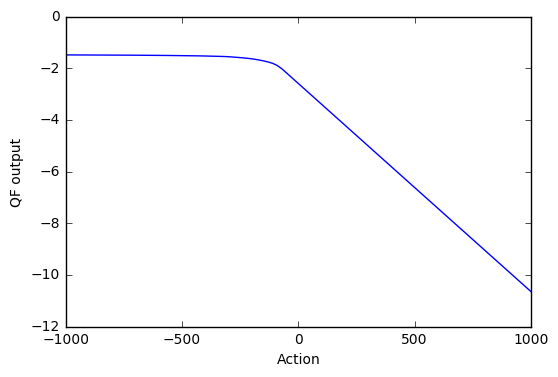

In [10]:
num_actions = 100

actions = np.linspace(-1000, 1000, num_actions)
actions = np.expand_dims(actions, axis=1)
random_state_single = np.random.rand(1, o_dim)
random_state = np.vstack([random_state_single for _ in range(num_actions)])

feed_dict = {
    qf.action_input: actions,
    qf.observation_input: random_state,
}
qf_output = qf.sess.run(
    qf.output,
    feed_dict=feed_dict
)

# plt.plot(np.tanh(actions), qf_output)
plt.plot(actions, qf_output)
plt.xlabel('Action')
plt.ylabel('QF output')
plt.show()

# Inspect correctness of this quadratic function

In [8]:
feed_dict = {
    qf.action_input: actions,
    qf.observation_input: random_state,
}
L_params, L, implicit_policy_output = qf.sess.run(
    [qf._internal_qf.L_params.output, qf._internal_qf.L, qf.implicit_policy.output],
    feed_dict=feed_dict
)

expected_values = -0.5 * ((actions - implicit_policy_output) * L[0][0][0])**2
plt.plot(actions, expected_values)
plt.xlabel('Action')
plt.ylabel('Expected QF output')
plt.show()

AttributeError: 'FeedForwardCritic' object has no attribute '_internal_qf'

In [9]:
plt.plot(actions, np.abs(expected_values - qf_output))
plt.xlabel('Action')
plt.ylabel('QF output error')
plt.show()

NameError: name 'expected_values' is not defined

Make sure diagonal values are exponentiated corrected

In [10]:
print(L[0])
print(np.exp(L_params[0]))

NameError: name 'L' is not defined

Make sure max action is the one taken by the implicit policy

In [8]:
max_index = np.argmax(qf_output, axis=0)
print(actions[max_index])
print(implicit_policy_output[0])

[[-1.]]


NameError: name 'implicit_policy_output' is not defined

# Plot implicit policy

[[-1.          0.43246771  0.84345072 -0.56658289]
 [-0.997998    0.43246771  0.84345072 -0.56658289]
 [-0.995996    0.43246771  0.84345072 -0.56658289]
 ..., 
 [ 0.995996    0.43246771  0.84345072 -0.56658289]
 [ 0.997998    0.43246771  0.84345072 -0.56658289]
 [ 1.          0.43246771  0.84345072 -0.56658289]]


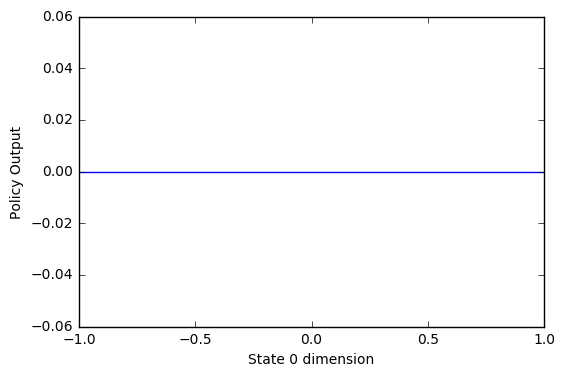

[[ 0.17991664 -1.          0.8455713  -0.51282439]
 [ 0.17991664 -0.997998    0.8455713  -0.51282439]
 [ 0.17991664 -0.995996    0.8455713  -0.51282439]
 ..., 
 [ 0.17991664  0.995996    0.8455713  -0.51282439]
 [ 0.17991664  0.997998    0.8455713  -0.51282439]
 [ 0.17991664  1.          0.8455713  -0.51282439]]


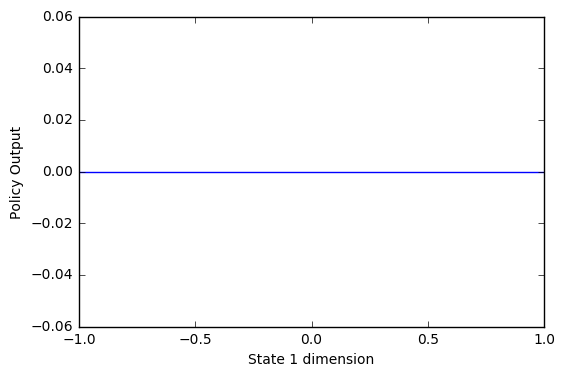

[[-0.45446781  0.81143553 -1.         -0.65910281]
 [-0.45446781  0.81143553 -0.997998   -0.65910281]
 [-0.45446781  0.81143553 -0.995996   -0.65910281]
 ..., 
 [-0.45446781  0.81143553  0.995996   -0.65910281]
 [-0.45446781  0.81143553  0.997998   -0.65910281]
 [-0.45446781  0.81143553  1.         -0.65910281]]


KeyboardInterrupt: 

In [11]:
o_delta = o_high - o_low
for dim_changing in range(4):
    num_states = 1000
    base_state = np.random.rand(1, o_dim) * o_delta + o_low
#     base_state = np.zeros((1, o_dim))
    linear_states = np.vstack([base_state for _ in range(num_states)])
    linear_states[:, dim_changing] = np.linspace(o_low, o_high, num_states)
    print(linear_states)
    
    policy_output = np.vstack([policy.get_action(state)[0] for state in linear_states])
    
    plt.plot(linear_states[:, dim_changing], policy_output)
    plt.xlabel('State {0} dimension'.format(dim_changing))
    plt.ylabel('Policy Output')
    plt.show()